# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)  # Set to display all columns of dataframes

In [2]:
# We start by reading in the datsets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Looking at the datatypes, entries per column, null entries per column, and percentages
print(train_df.info())
print()
print(test_df.info())
print()
print(train_df.isnull().sum())
print((train_df.isnull().sum()/train_df.shape[0])*100)
print()
print(test_df.isnull().sum())
print((test_df.isnull().sum()/test_df.shape[0])*100)

# And taking a look at a sample of the data in our datasets
print(train_df.sample(15))
print()
print()
print(test_df.sample(15))

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Feature Explanation

|Feature:|Explanation|Data Type|
|---|---|---|
|PassengerId:|A unique id for each passenger. Each Id takes the form gggg_pp where gggg indicates the group the passenger is travelling with and the pp is their number within the group. People in a group are often family memebrs, but not always.|object|
|HomePlanet:|The planet the passneger departed from, typically theoir planet of permanent residence.|object|
|CryoSleep:|Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers incryosleep are confined to their cabins.|object|
|Cabin:|The cabin number where the passenger is staying. Takes the form deck/number/side, where side can be either P for port or S for Starboard.|object|
|Destination:|The planet the passenger will be debarking to.|object|
|Age:|Pretty self-explanitory.|float|
|VIP:|Whether the passenger has paid for special VIP service during the voyage.|object|
|RoomService:|The amount of money the passenge has spent on room service.|float|
|FoodCourt:|The amount of money the passenger has spent at the food court.|float|
|ShoppingMall:|The amount of money the passenger has spent at the shopping mall.|float|
|Spa:|The amount of money the passenger has spent at the spa.|float|
|VRDeck:|The amount of money the passenger has spent at the VR Deck.|float|
|Name:|The name of the passenger.|object|
|Transported:|Whether or not the passenger was transported to another dimension. This is the dependent variable.|boolean|


In [3]:
# We make a copy of our data set so that we do not affect the original data set
df1 = df.copy()

In [4]:
# First we'll check the distribution of our target variable, both by count and by percentage 

print(df1['Transported'].value_counts())
print()
print(df1['Transported'].value_counts(normalize=True))

Transported
True     4378
False    4315
Name: count, dtype: int64

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


So our target variable is pretty evenly distributed among the passengers, a little more than 50% were transported and about 50% weren't

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

HomePlanet
Earth     0.541922
Europa    0.250942
Mars      0.207136
Name: proportion, dtype: float64

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

CryoSleep
False    0.641694
True     0.358306
Name: proportion, dtype: float64

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

Destination
TRAPPIST-1e      0.694983
55 Cancri e      0.211491
PSO J318.5-22    0.093526
Name: proportion, dtype: float64

VIP
False    8291
True      199
Name: count, dtype: int64

VIP
False    0.976561
True     0.023439
Name: proportion, dtype: float64


<Axes: xlabel='VIP'>

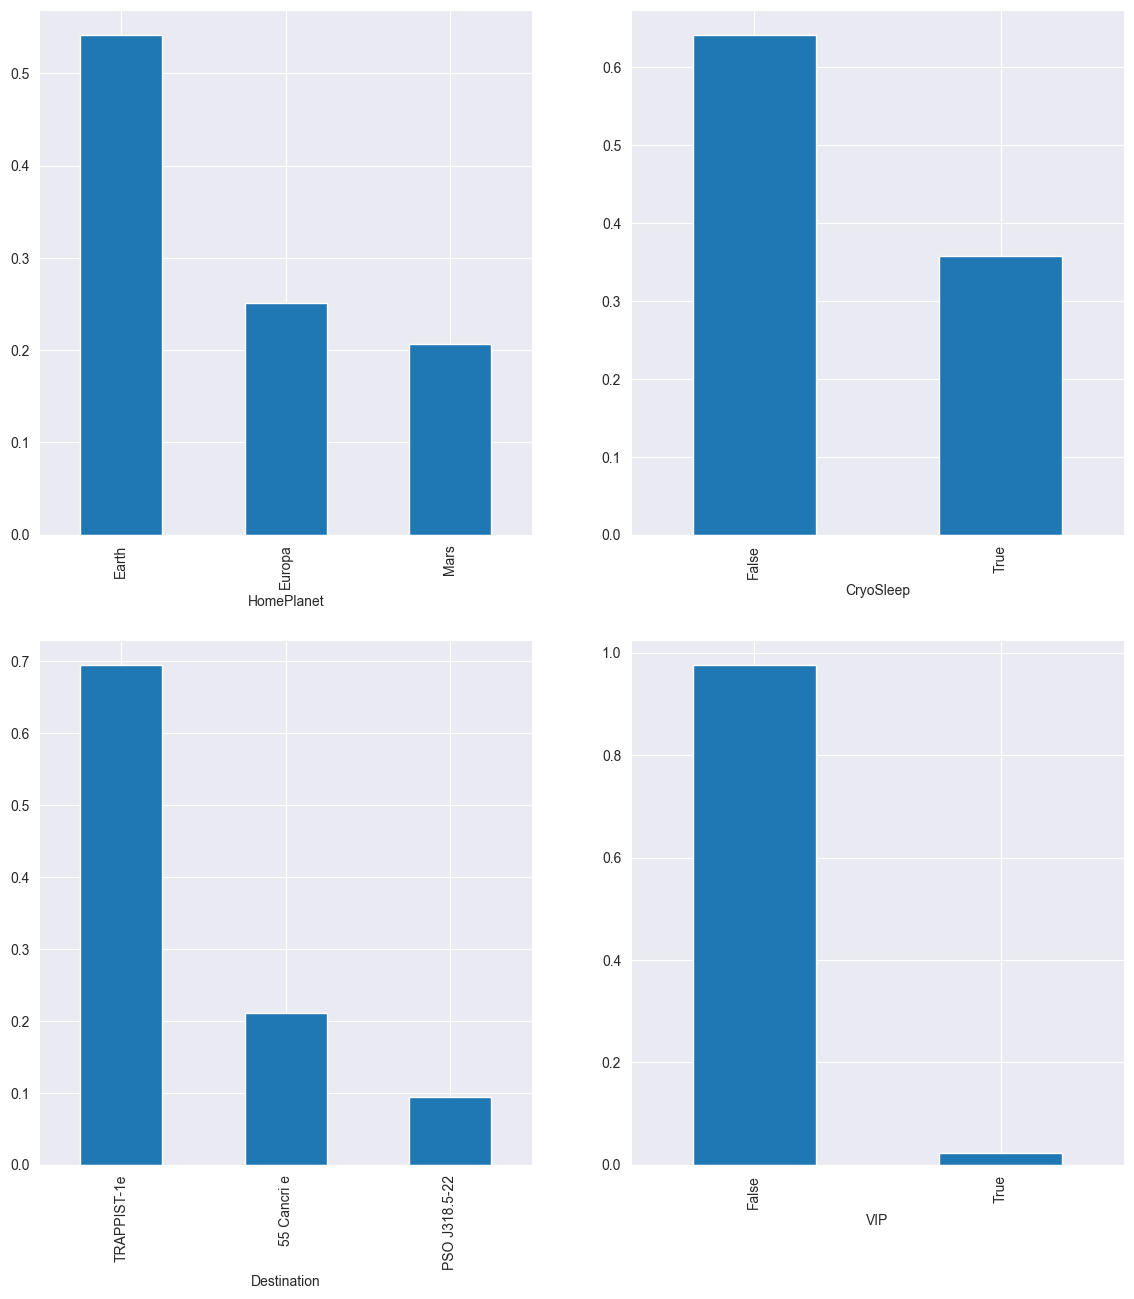

In [5]:
# Now let's look at the distribution of our categorical variables

print(df1['HomePlanet'].value_counts())
print()
print(df1['HomePlanet'].value_counts(normalize=True))
print()
print(df1['CryoSleep'].value_counts())
print()
print(df1['CryoSleep'].value_counts(normalize=True))
print()
print(df1['Destination'].value_counts())
print()
print(df1['Destination'].value_counts(normalize=True))
print()
print(df1['VIP'].value_counts())
print()
print(df1['VIP'].value_counts(normalize=True))

plt.figure(figsize=(14,15))
plt.subplot(221)
df1['HomePlanet'].value_counts(normalize=True).plot.bar()
plt.subplot(222)
df1['CryoSleep'].value_counts(normalize=True).plot.bar()
plt.subplot(223)
df1['Destination'].value_counts(normalize=True).plot.bar()
plt.subplot(224)
df1['VIP'].value_counts(normalize=True).plot.bar()

- 54% of passengers came from Earth, 25% came from Europa, and 21% came from Mars
- 35% of passengers opted to be put in cryo sleep for the journey, while 65% did not
- 69% of passengers were headed to TRAPPIST-1e, 21% to 55 Cancri e, 9% to PSO J318.5-22, leaving about 1% as unknown
- 98% were not VIP's, while 2% were 

Next we'll look at the distribution of our passengers by Deck and Side

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

CabinDeck
F    0.328938
G    0.301271
E    0.103132
B    0.091712
C    0.087944
D    0.056275
A    0.030139
T    0.000589
Name: proportion, dtype: float64

CabinSide
S    4288
P    4206
Name: count, dtype: int64

CabinSide
S    0.504827
P    0.495173
Name: proportion, dtype: float64


<Axes: title={'center': 'CabinSide'}, xlabel='CabinSide'>

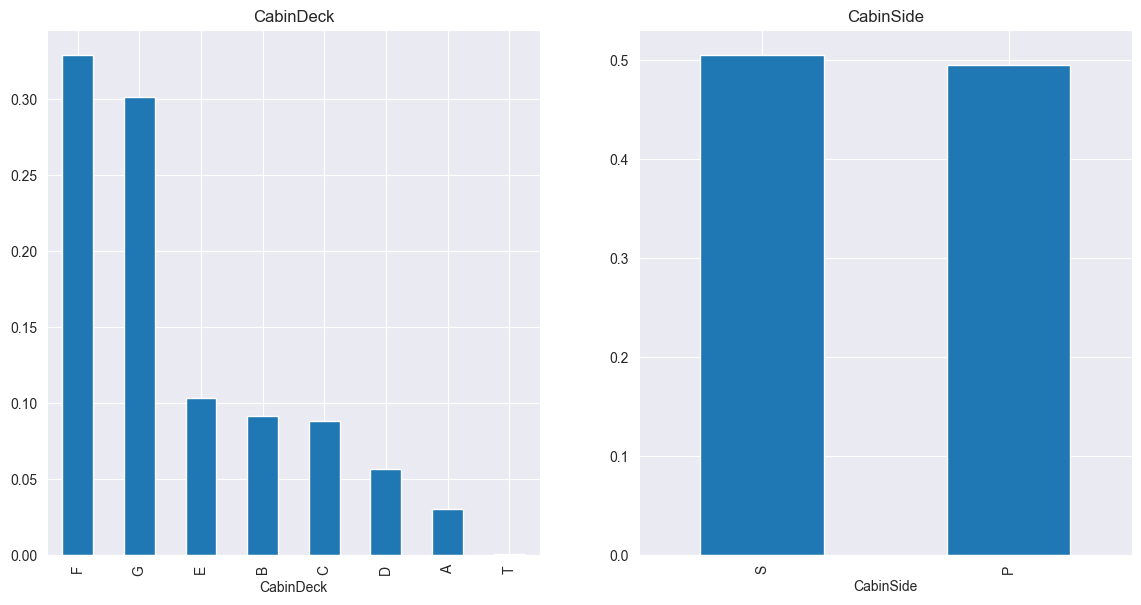

In [6]:
# We will need to do a bit of work to visualize the distribution of our cabin variable
# First we extract the new features: CabinDeck, CabinNo. and CabinSide from our Cabin feature using the split method
df1[["CabinDeck", "CabinNo.", "CabinSide"]] = df1["Cabin"].str.split('/', expand = True)

print(df1['CabinDeck'].value_counts())
print()
print(df1['CabinDeck'].value_counts(normalize=True))
print()
print(df1['CabinSide'].value_counts())
print()
print(df1['CabinSide'].value_counts(normalize=True))

# Visualize cabin feature
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
df1['CabinDeck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck')
plt.subplot(222)
df1['CabinSide'].value_counts(normalize = True).plot.bar(title = 'CabinSide')

- It looks like the distibution between the two sides of the ship is fairly even
- The majority of people were staying on Decks F and G

Now let's take a look at the distribution of our numerical features

#### Age

<Figure size 640x480 with 0 Axes>

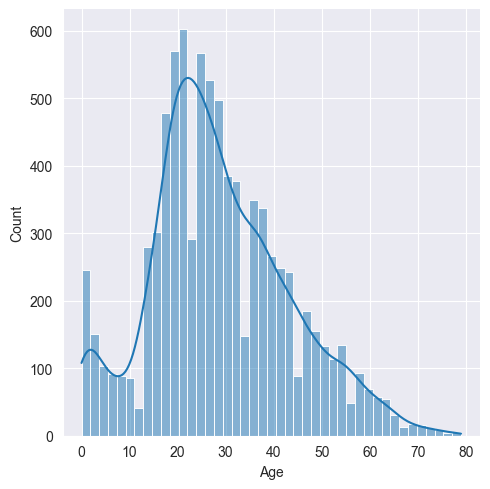

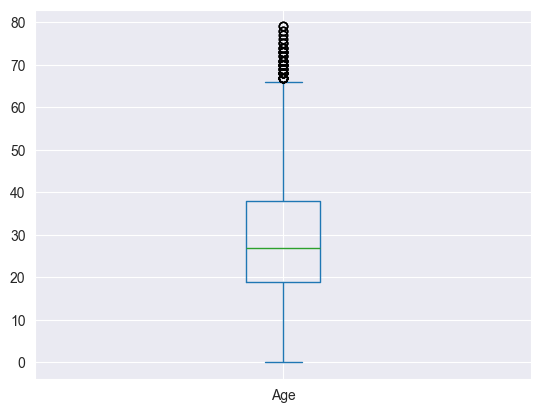

In [7]:
# Visualize Age variable
plt.figure()
sns.displot(df1['Age'],kde=True)

plt.figure()
df1['Age'].plot.box()

plt.show()

#### Room Service

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\1481196350.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['RoomService']);


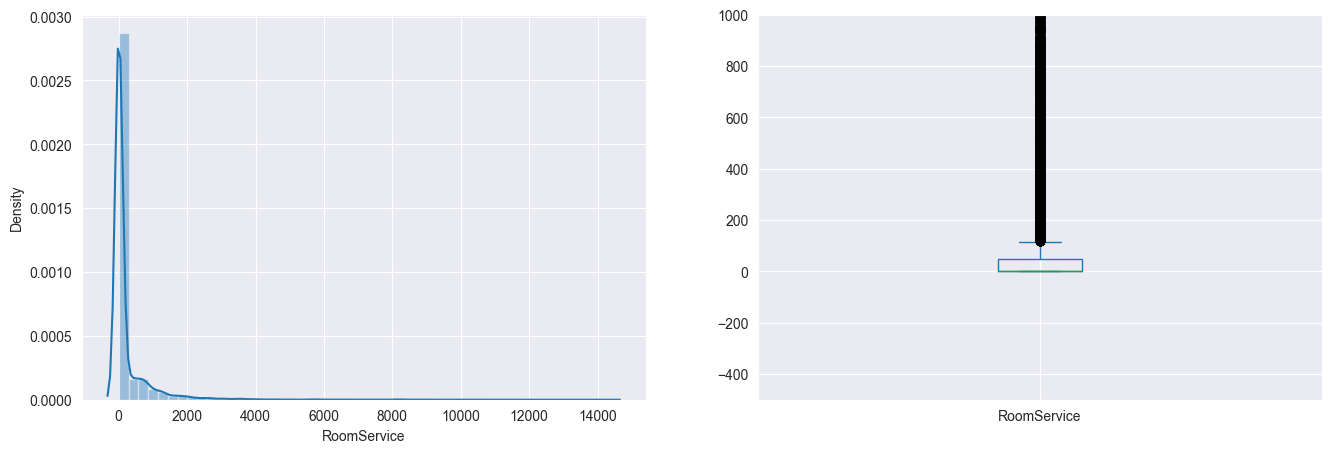

In [8]:
# Visualize RoomService variable
plt.figure(1)
plt.subplot(121)
sns.distplot(df1['RoomService']);
plt.subplot(122)
df1['RoomService'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

Highly right-skew

#### Food Court

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\1571743756.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['FoodCourt']);


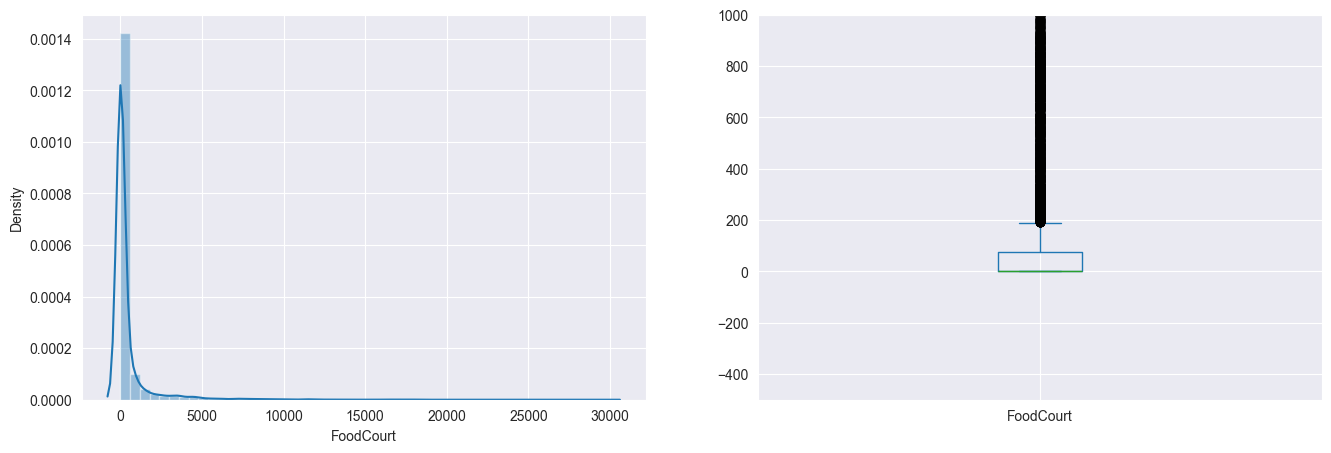

In [9]:
# Visualize FoodCourt variable
plt.figure(1)
plt.subplot(121)
sns.distplot(df1['FoodCourt']);
plt.subplot(122)
df1['FoodCourt'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

Again highly right skewed

#### Shopping Mall

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\2124596744.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['ShoppingMall']);


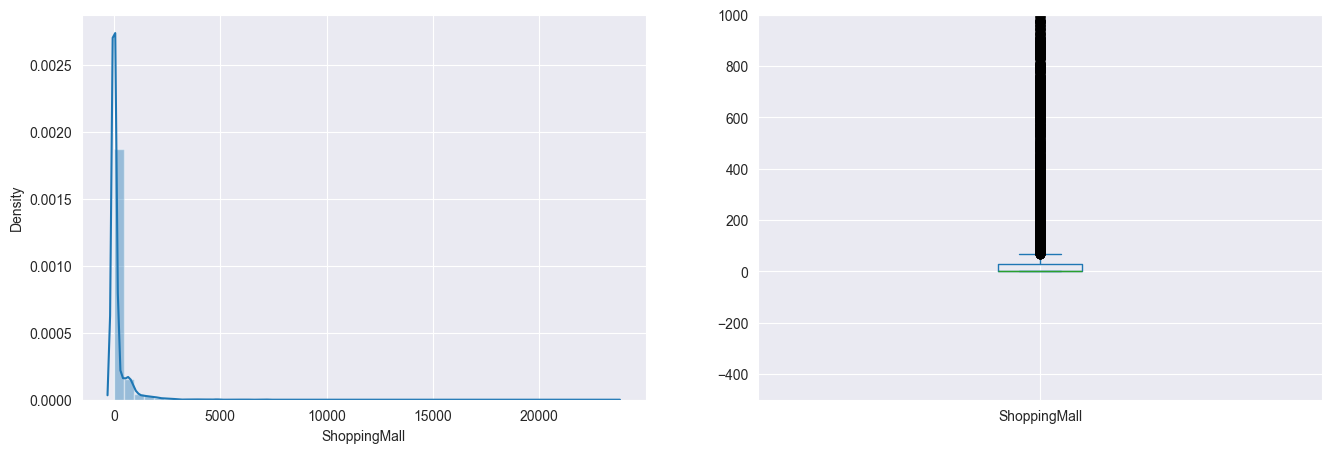

In [10]:
# Visualize ShoppingMall variable
plt.figure(1)
plt.subplot(121)
sns.distplot(df1['ShoppingMall']);
plt.subplot(122)
df1['ShoppingMall'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

Again highly right skewed

#### Spa

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3965702262.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Spa']);


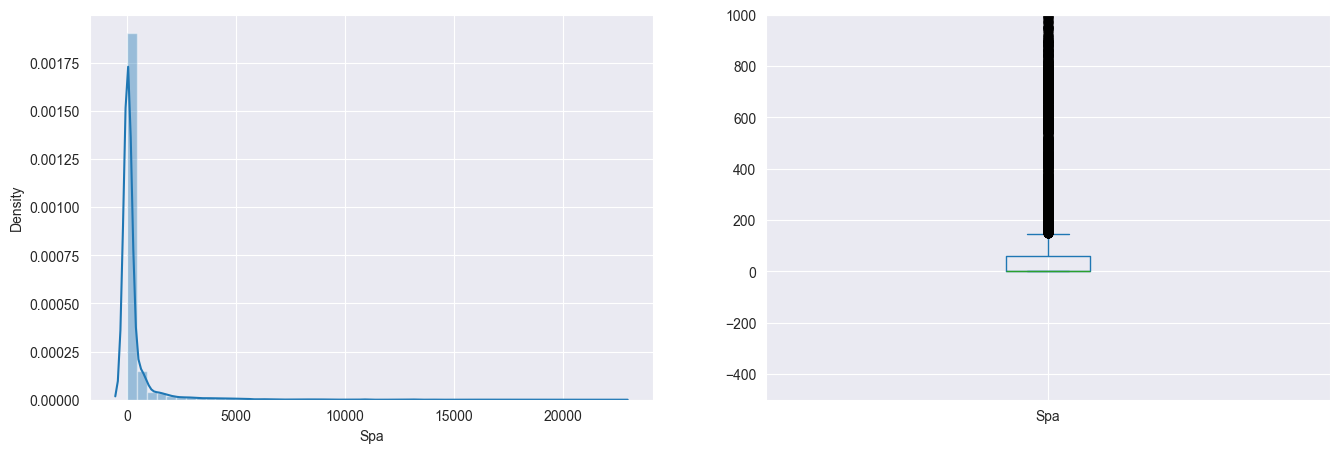

In [11]:
# Visualize Spa variable
plt.figure(1)
plt.subplot(121)
sns.distplot(df1['Spa']);
plt.subplot(122)
df1['Spa'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

Highly right skew

VR Deck

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3222679203.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['VRDeck']);


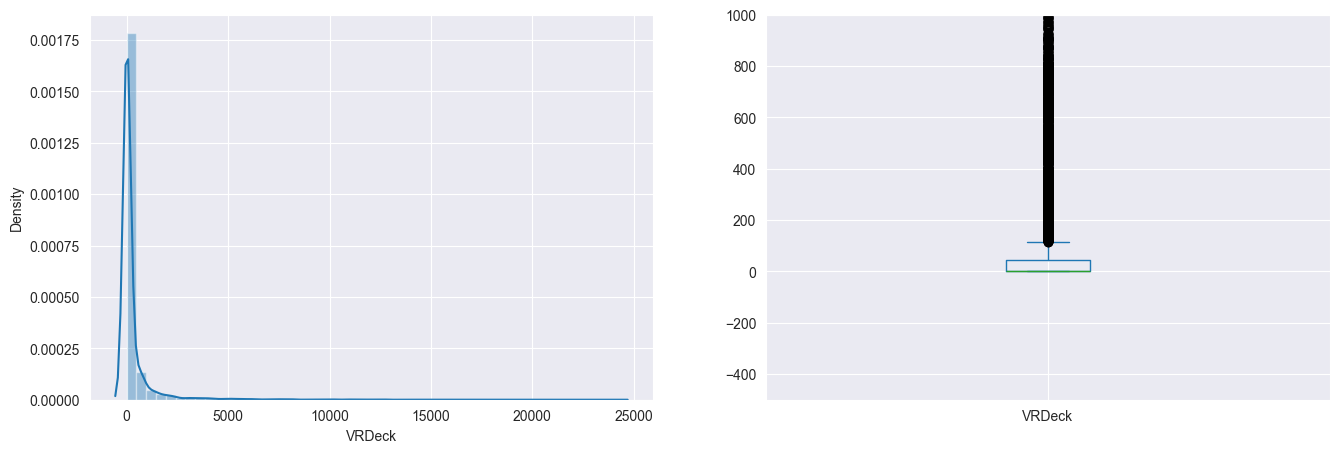

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df1['VRDeck']);
plt.subplot(122)
df1['VRDeck'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

And what a surprise highly right skew

# Feature Relations

### Categorical Data

Now that we have a grasp of what each variable is and its distribution within our data set it is time to turn our attention to answering the question, what effect does each of these variable have on our dependant variable?

In [13]:

HomePlanet_Transported = df1.groupby('HomePlanet').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

HomePlanet_Transported['TransportedPercentage'] = HomePlanet_Transported['Transported'] / HomePlanet_Transported['PassengerId']

CryoSleep_Transported = df1.groupby('CryoSleep').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CryoSleep_Transported['TransportedPercentage'] = CryoSleep_Transported['Transported'] / CryoSleep_Transported['PassengerId']

Destination_Transported = df1.groupby('Destination').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Destination_Transported['TransportedPercentage'] = Destination_Transported['Transported'] / Destination_Transported['PassengerId']

VIP_Transported = df1.groupby('VIP').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

VIP_Transported['TransportedPercentage'] = VIP_Transported['Transported'] / VIP_Transported['PassengerId']

In [14]:
HomePlanet_Transported, print(), CryoSleep_Transported,print(),Destination_Transported,print(),VIP_Transported

(  HomePlanet  Transported  PassengerId  TransportedPercentage
 0      Earth         1951         4602               0.423946
 1     Europa         1404         2131               0.658846
 2       Mars          920         1759               0.523024,
 None,
    CryoSleep  Transported  PassengerId  TransportedPercentage
 0      False         1789         5439               0.328921
 1       True         2483         3037               0.817583,
 None,
      Destination  Transported  PassengerId  TransportedPercentage
 0    55 Cancri e         1098         1800               0.610000
 1  PSO J318.5-22          401          796               0.503769
 2    TRAPPIST-1e         2787         5915               0.471175,
 None,
      VIP  Transported  PassengerId  TransportedPercentage
 0  False         4198         8291               0.506332
 1   True           76          199               0.381910)

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3805503489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "HomePlanet",
C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3805503489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "CryoSleep", y = "TransportedPercentage", data = CryoSleep_Transported, order = CryoSleep_Transported.sort_values('TransportedPercentage', ascending = False).CryoSleep,palette='Set2')
C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3805503489.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

<Axes: xlabel='VIP', ylabel='TransportedPercentage'>

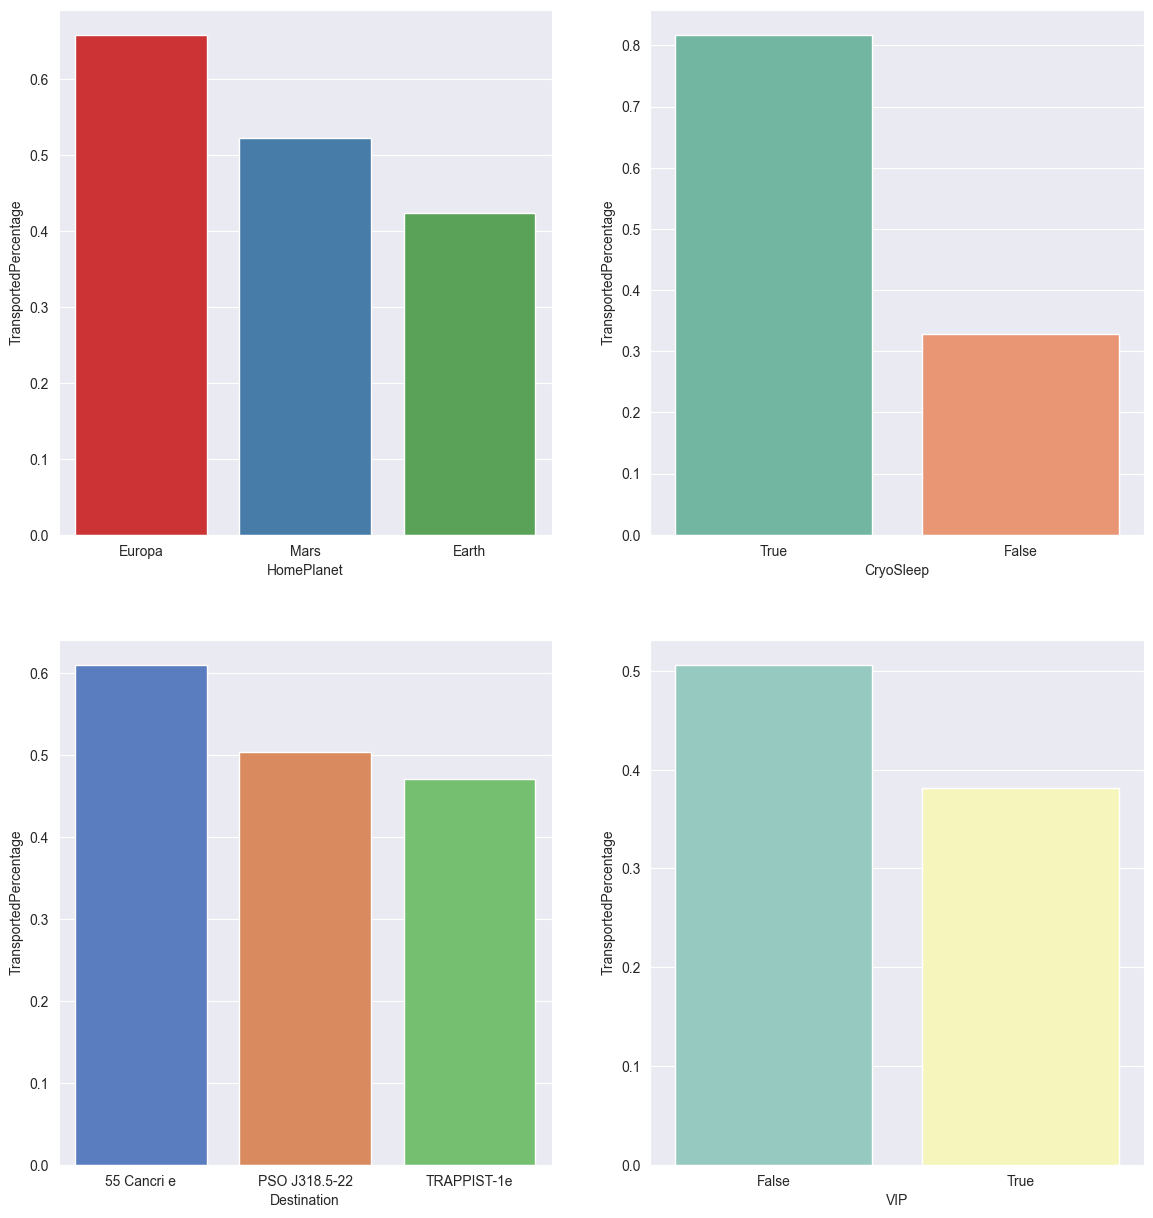

In [15]:
# Visualize categorical features vs target variable
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
sns.barplot(x = "HomePlanet",
            y = "TransportedPercentage",
            data = HomePlanet_Transported,
            order = HomePlanet_Transported.sort_values('TransportedPercentage', ascending = False).HomePlanet,
            palette="Set1")
plt.subplot(222)
sns.barplot(x = "CryoSleep", y = "TransportedPercentage", data = CryoSleep_Transported, order = CryoSleep_Transported.sort_values('TransportedPercentage', ascending = False).CryoSleep,palette='Set2')
plt.subplot(223)
sns.barplot(x = "Destination", y = "TransportedPercentage", data = Destination_Transported, order = Destination_Transported.sort_values('TransportedPercentage', ascending = False).Destination,palette='muted')
plt.subplot(224)
sns.barplot(x = "VIP", y = "TransportedPercentage", data = VIP_Transported, order = VIP_Transported.sort_values('TransportedPercentage', ascending = False).VIP,palette='Set3')

- We see that 65% of the passengers from Europa were transported, 52% of those from Mars were transported, and 42% of the from Eart were transported
- We also see that 82% of the passengers in cryo sleep were transported while only 33% of the passengers whoe were awake were transported
    - seems like being in cryo sleep may be a good indicator for whether or not you were lost to space
- 61% of passengers on their way to 55 Cancri e were transported, 50% on their way to PSO J318.5-22 were transported, and 47% of those headed to TRAPPIST-1e were transported
- 51% of passengers who were not VIPs were transported, while only 38% of passengers with VIP status were transported
    - save the rich woman and children first

  CabinDeck  Transported  PassengerId  TransportedPercentage
0         A          127          256               0.496094
1         B          572          779               0.734275
2         C          508          747               0.680054
3         D          207          478               0.433054
4         E          313          876               0.357306
5         F         1229         2794               0.439871
6         G         1321         2559               0.516217
7         T            1            5               0.200000

  CabinSide  Transported  PassengerId  TransportedPercentage
0         P         1898         4206               0.451260
1         S         2380         4288               0.555037


C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\2902811776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "CabinDeck", y = "TransportedPercentage", data = CabinDeck_Transported, order = CabinDeck_Transported.sort_values('TransportedPercentage', ascending = False).CabinDeck,palette='rainbow')
C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\2902811776.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "CabinSide", y = "TransportedPercentage", data = CabinSide_Transported, order = CabinSide_Transported.sort_values('TransportedPercentage', ascending = False).CabinSide,palette='coolwarm')


<Axes: xlabel='CabinSide', ylabel='TransportedPercentage'>

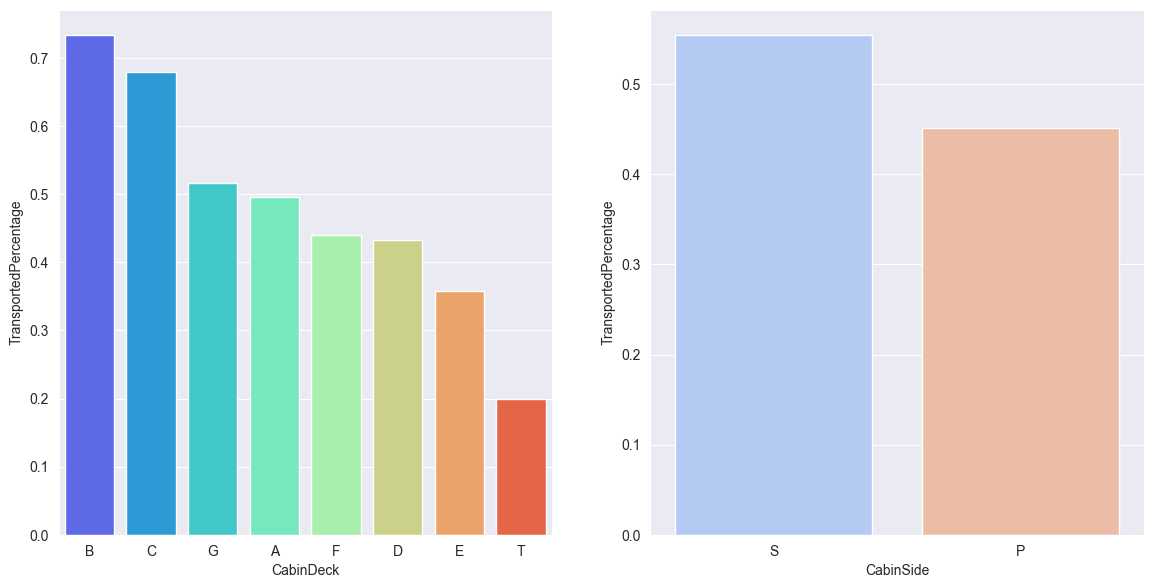

In [16]:
# Next we'll take a look at te distribution of those transported by deck and side
CabinDeck_Transported = df1.groupby('CabinDeck').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinDeck_Transported['TransportedPercentage'] = CabinDeck_Transported['Transported'] / CabinDeck_Transported['PassengerId']

CabinSide_Transported = df1.groupby('CabinSide').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinSide_Transported['TransportedPercentage'] = CabinSide_Transported['Transported'] / CabinSide_Transported['PassengerId']

print(CabinDeck_Transported)
print()
print(CabinSide_Transported)


# Visualize Cabin features vs target variable
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
sns.barplot(x = "CabinDeck", y = "TransportedPercentage", data = CabinDeck_Transported, order = CabinDeck_Transported.sort_values('TransportedPercentage', ascending = False).CabinDeck,palette='rainbow')
plt.subplot(222)
sns.barplot(x = "CabinSide", y = "TransportedPercentage", data = CabinSide_Transported, order = CabinSide_Transported.sort_values('TransportedPercentage', ascending = False).CabinSide,palette='coolwarm')

There seems to be some pretty significant information here as more than 73% of passengers on Deck B and 68% of passengers on Deck C were lost to space. Looking at the graph of those transported by side, my first thought is that more people on the Starboard side of Decks B and C were transported than those on the port Side of Decks B and C. Furthermore, we see that those residing on Decks A and G were transported at a rate of about 50%, this is in line with the general numbers of those transported vs those not transported, so it is doubtful that residing on these decks will be helpful in predicting whther or not a passenger was transported to another dimension. Those transported on Decks F and D are slightly below the mean at 44% and 43%, and the remaining decks of E and T are lost at a far lower rate than the mean indicating that these may be value in our predictive model.

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\23672015.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "CountInPassengerGroup",


<Axes: xlabel='CountInPassengerGroup', ylabel='TransportedPercentage'>

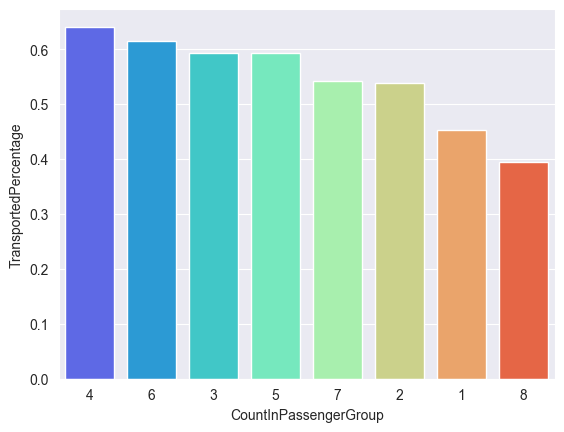

In [17]:
# Next we turn our attention towards determing the importance of a passengers group number within their PassengerId number in predicting whether or not they were lost to space
# First we will need to split the entries of this column
df1['PassengerGroup'] = df1['PassengerId'].str.split('_',expand=True)[0]


# Create dataframe -No_People_In_PassengerGroup that contains the PassengerGroup and the no passengers in the group 
df1_by_PassengerGroup = df1.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
df1_by_PassengerGroup = df1_by_PassengerGroup.rename(columns = {"PassengerId": "CountInPassengerGroup"})

df1 = df1.merge(df1_by_PassengerGroup[["PassengerGroup", "CountInPassengerGroup"]], how = 'left', on = ['PassengerGroup'])
# create dataframe NoInPassengerGroup_Transported that has No of passengers in a group transported and the percentage of passengers in a group transported
df1_by_PassengerGroup_Transported = df1.groupby('CountInPassengerGroup').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

df1_by_PassengerGroup_Transported['TransportedPercentage'] = df1_by_PassengerGroup_Transported['Transported'] / df1_by_PassengerGroup_Transported['PassengerId']

# Visualize NoInPassengerGroup vs transported
sns.barplot(x = "CountInPassengerGroup",
            y = "TransportedPercentage",
            data = df1_by_PassengerGroup_Transported,
            order = df1_by_PassengerGroup_Transported.sort_values('TransportedPercentage',ascending = False).CountInPassengerGroup,
            palette='rainbow')

In [18]:
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNo.,CabinSide,PassengerGroup,CountInPassengerGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,9276,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,9278,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,9279,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,9280,2


Here we see that passengers in groups 1 and 8 were transported at a lower rate than the mean and passengers in all of the other groups were transported at a rate above the mean. I am hesitant to conclude anything from this information as there is no clear pattern or relationship demonstrated above. Let's see what else we can find before determining if group number plays an important role in determining if a pessenger was transported to another dimension or not.

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\2127594975.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "IsAlone", y = "TransportedPercentage", data = IsAlone_Transported, order = IsAlone_Transported.sort_values('TransportedPercentage', ascending = False).IsAlone,palette='coolwarm')


<Axes: xlabel='IsAlone', ylabel='TransportedPercentage'>

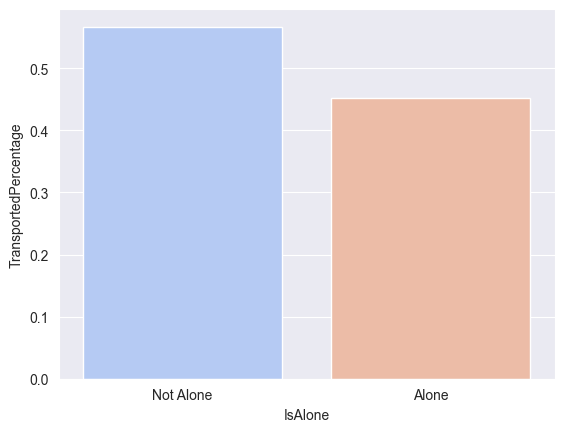

In [19]:
df1_by_PassengerGroup["IsAlone"] = df1_by_PassengerGroup["CountInPassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")
df1 = df1.merge(df1_by_PassengerGroup[["PassengerGroup", "IsAlone"]], how = 'left', on = ['PassengerGroup'])

IsAlone_Transported = df1.groupby('IsAlone').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe IsAlone_Transported that contains percentage of passengers transported Alone or Not Alone
IsAlone_Transported['TransportedPercentage'] = IsAlone_Transported['Transported'] / IsAlone_Transported['PassengerId']

# Visualize IsAlone vs transported
sns.barplot(x = "IsAlone", y = "TransportedPercentage", data = IsAlone_Transported, order = IsAlone_Transported.sort_values('TransportedPercentage', ascending = False).IsAlone,palette='coolwarm')

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\4216446995.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  FamilySizeCat_Transported = df1.groupby('FamilySizeCat').aggregate({'Transported': 'sum',
C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\4216446995.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "FamilySizeCat", y = "TransportedPercentage", data = FamilySizeCat_Transported, order = FamilySizeCat_Transported.sort_values('TransportedPercentage', ascending = False).FamilySizeCat,palette='Set1')


<Axes: xlabel='FamilySizeCat', ylabel='TransportedPercentage'>

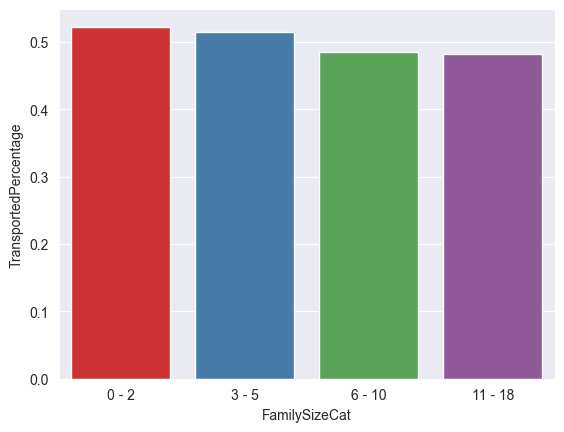

In [20]:
# Extract FamilyName column from Name column
df1["FamilyName"] = df1["Name"].str.split(' ', expand = True)[1]

# Create dataframe -NoRelatives that contains the FamilyName and the no of relatives in a Family
NoRelatives = df1.groupby('FamilyName')['PassengerId'].count().reset_index()
NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NoRelatives"})

df1 = df1.merge(NoRelatives[["FamilyName", "NoRelatives"]], how = 'left', on = ['FamilyName'])

df1["FamilySizeCat"] = pd.cut(df1.NoRelatives, bins = [0, 2, 5, 10, 18], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 18'])

# create dataframe FamilySizeCat_Transported that has the Family Size Category and the percentage transported
FamilySizeCat_Transported = df1.groupby('FamilySizeCat').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

FamilySizeCat_Transported['TransportedPercentage'] = FamilySizeCat_Transported['Transported'] / FamilySizeCat_Transported['PassengerId']

# Visualize FamilySizeCat vs transported
sns.barplot(x = "FamilySizeCat", y = "TransportedPercentage", data = FamilySizeCat_Transported, order = FamilySizeCat_Transported.sort_values('TransportedPercentage', ascending = False).FamilySizeCat,palette='Set1')

It seems that passengers belonging to families of smaller size were transported at a higher rate than the mean and those of larger family sizes were transported at a rate lower than that of the mean.

(-800.0, 12000.0)

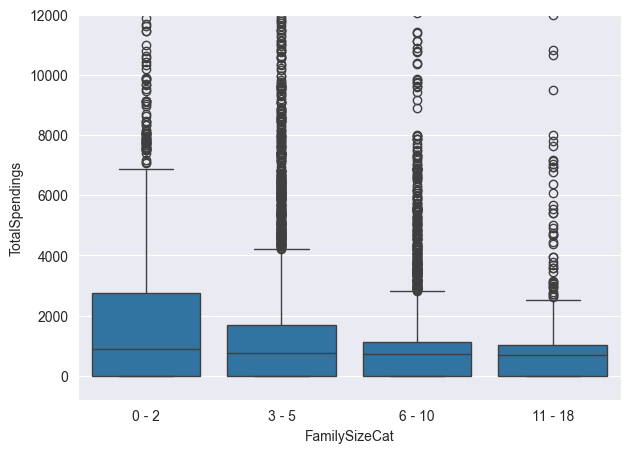

In [21]:
# Create total spending feature
df1["TotalSpendings"] = df1["FoodCourt"] + \
                                 df1["ShoppingMall"] + \
                                 df1["RoomService"] + \
                                 df1["Spa"] + \
                                 df1["VRDeck"]

# FamilySizeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = df1, x = "FamilySizeCat", y = "TotalSpendings")
plt.ylim([-800, 12000])

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\1357368094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df1, x = "FamilySizeCat", y = "TotalSpendings",palette='coolwarm')


(-800.0, 12000.0)

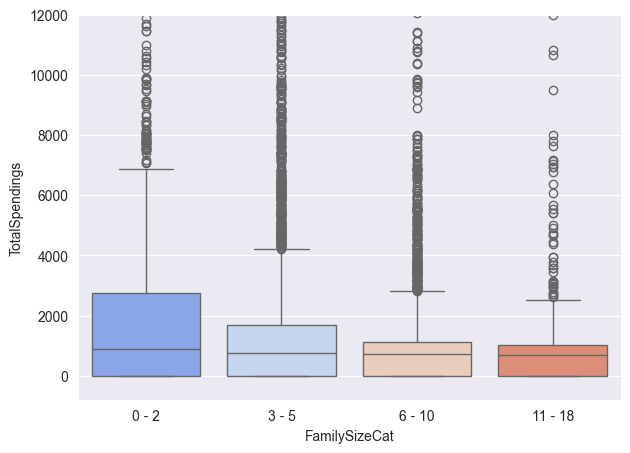

In [22]:
# FamilySizeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = df1, x = "FamilySizeCat", y = "TotalSpendings",palette='coolwarm')
plt.ylim([-800, 12000])

This information indicates that smaller families are wealthier on average, or at least they are spending more mony on frivolous items on this spaceship

### Numerical Data

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\2979231016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Transported", y= "Age",data=df1,palette=["#1f77b4", "#ff7f0e"])


(-50.0, 200.0)

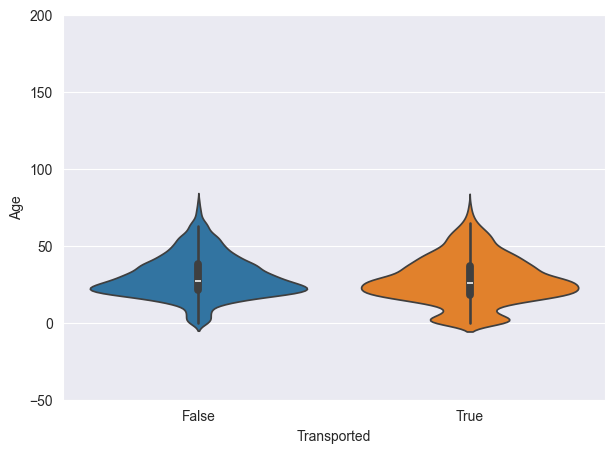

In [23]:
# Transported vs Age
plt.figure(figsize = (7, 5))
sns.violinplot(x="Transported", y= "Age",data=df1,palette=["#1f77b4", "#ff7f0e"])
plt.ylim([-50, 200])

The violin plots above demonstrate that the percentage of passengers, ages approximately 0 to 8, who were transported to another dimension is higher than that of passengers ages 0 to 8 that were not transported to another dimension. Also, it seems that the percentage of younger passengers that were transported is higher than the percentage of older passengers that were transported.

Given this we would like to see what happens to our data set if we categorize age?

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\78632151.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AgeCat_Transported = df1.groupby('AgeCat').aggregate({'Transported':'sum',
C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\78632151.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeCat',y='TransportedPercentage',data=AgeCat_Transported,order=AgeCat_Transported.sort_values(by='TransportedPercentage',ascending=False).AgeCat,palette='bright')


<Axes: xlabel='AgeCat', ylabel='TransportedPercentage'>

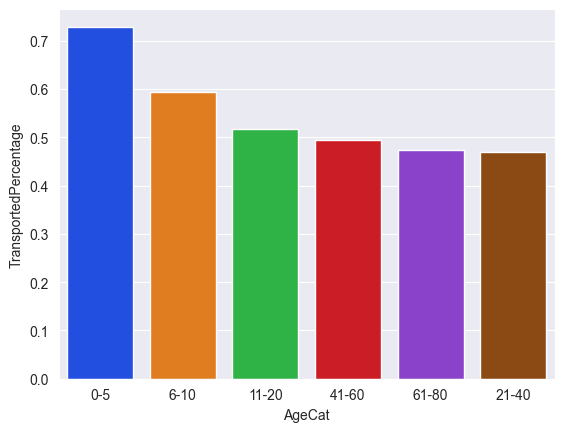

In [24]:
df1['AgeCat'] = pd.cut(df1.Age,bins=[0.0,5.0,10.0,20.0,40.0,60.0,80.0],labels=['0-5','6-10','11-20','21-40','41-60','61-80'])

AgeCat_Transported = df1.groupby('AgeCat').aggregate({'Transported':'sum',
                                                     'PassengerId':'size'
                                                     }).reset_index()

#create the dataframe AgeCat_Transported that has the Age Category and the percentage transported
AgeCat_Transported['TransportedPercentage']=AgeCat_Transported['Transported'] / AgeCat_Transported['PassengerId']

sns.barplot(x='AgeCat',y='TransportedPercentage',data=AgeCat_Transported,order=AgeCat_Transported.sort_values(by='TransportedPercentage',ascending=False).AgeCat,palette='bright')

In [25]:
AgeCat_Transported

,AgeCat,Transported,PassengerId,TransportedPercentage
0,0-5,234,321,0.728972
1,6-10,130,219,0.593607
2,11-20,889,1717,0.517764
3,21-40,2039,4348,0.468951
4,41-60,748,1511,0.495036
5,61-80,104,220,0.472727


- 73% of kids age 0-5 were transported
- 59% of kids ages 6-10 were transported
- the remaining age categories all have a transported percentage hovering around the overall mean

Apparently if you were a young child, the chances you got transported to another dimension was much higher than if you were a grown adult.

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3452103123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x ="Transported",y ="RoomService",data=df1,palette=["#1f77b4", "#ff7f0e"])
C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3452103123.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x ="Transported",y ="FoodCourt",data=df1,palette=["#1f77b4", "#ff7f0e"])
C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3452103123.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x ="Transported",y ="ShoppingMall",data=df1,palett

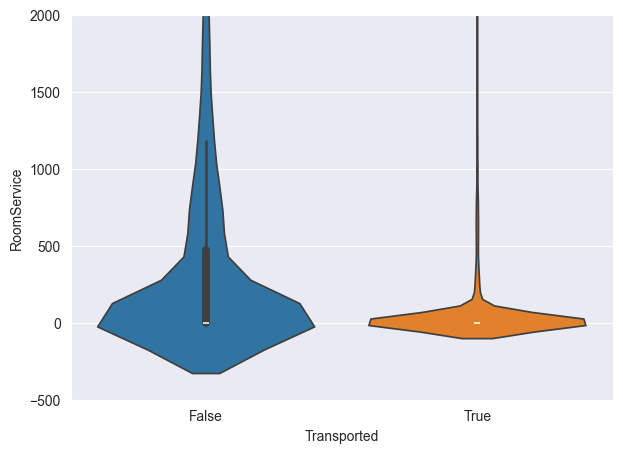

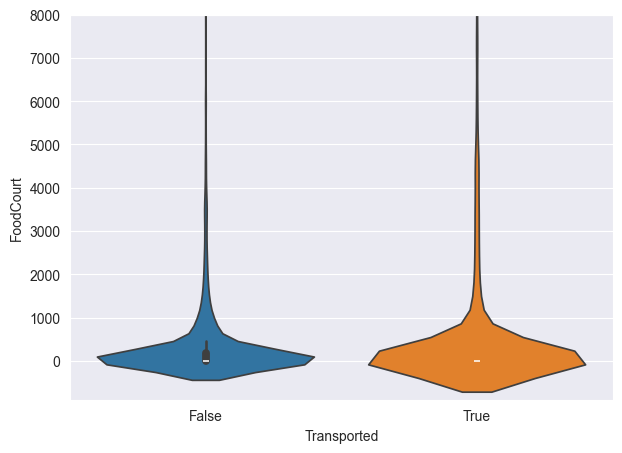

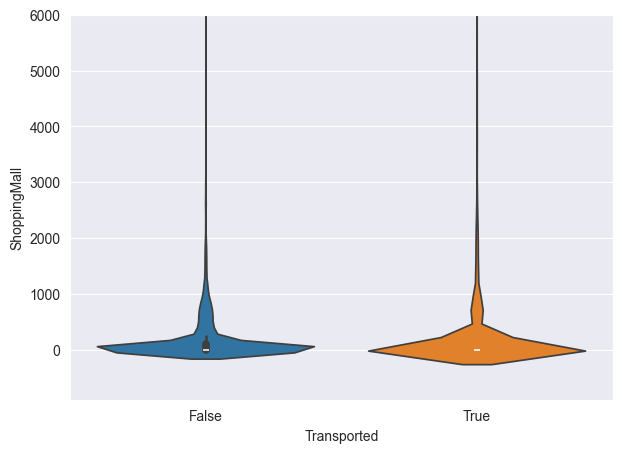

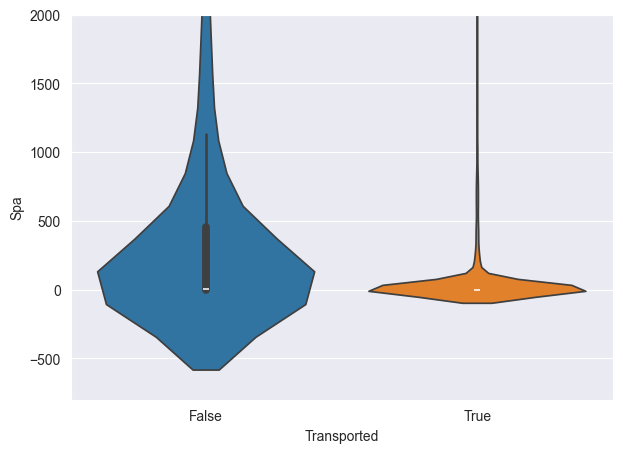

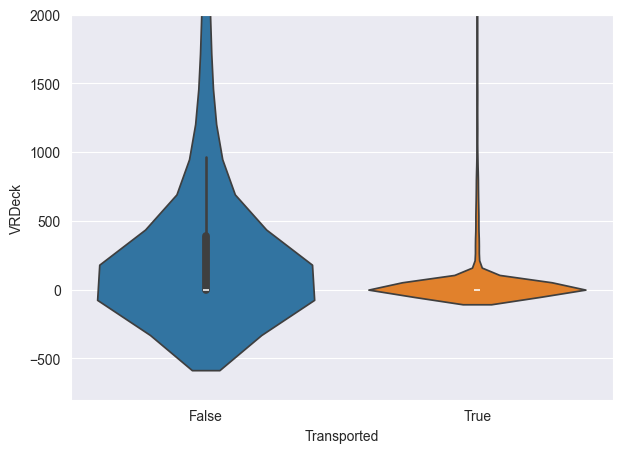

In [26]:
# Similarly we consider violin plots of the remaining numerical features against our dependant variable
#  RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
plt.figure(figsize = (7, 5)) 
sns.violinplot(x ="Transported",y ="RoomService",data=df1,palette=["#1f77b4", "#ff7f0e"])
plt.ylim([-500, 2000])

plt.figure(figsize = (7, 5))
sns.violinplot(x ="Transported",y ="FoodCourt",data=df1,palette=["#1f77b4", "#ff7f0e"])
plt.ylim([-900, 8000])

plt.figure(figsize = (7, 5))
sns.violinplot(x ="Transported",y ="ShoppingMall",data=df1,palette=["#1f77b4", "#ff7f0e"])
plt.ylim([-900, 6000])

plt.figure(figsize = (7, 5))
sns.violinplot(x ="Transported",y ="Spa",data=df1,palette=["#1f77b4", "#ff7f0e"])
plt.ylim([-800, 2000])

plt.figure(figsize = (7, 5))
sns.violinplot(x ="Transported",y ="VRDeck",data=df1,palette=["#1f77b4", "#ff7f0e"])
plt.ylim([-800, 2000])

plt.show()

- The money spent by passengers that were transported is much more concentrated around 0 for the features of 'RoomService', "Spa", and 'VRDeck' than it is for those who were not transported
- It would seem that the money spent by those who were transported is no different than the money spent by those who were not transported relative to the variable of FoodCourt and ShoppingMall

My initial hunch is that some of this concentration around zero is due to the fact that people in CryoSleep probably aren't sapending any money anywhere, but let's double check this just to make sure.

(-900.0, 14000.0)

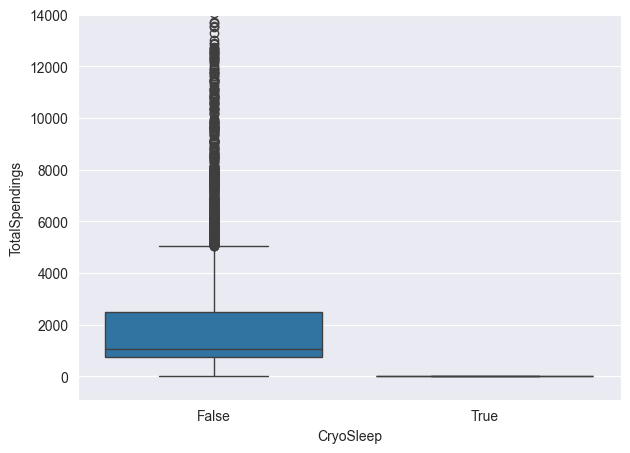

In [27]:
# CryoSleep vs TotalSpendings
plt.figure(figsize = (7, 5))

sns.boxplot(data = df1, x = "CryoSleep", y = "TotalSpendings")
plt.ylim([-900, 14000])

And my asssumption is correct. How could you spend money when you are asleep (and there is no chance of you sleep walking because this is no ordinary sleep, this is cryo sleep)?

...

...

...

The answer: you can't.

Let's keep this assumption train going and verify that you are more likely to spend money if you are a VIP than if you are not (I mean you have already paid for the VIP status).

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3637562997.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df1, x = "VIP", y = "TotalSpendings",palette=["#1f77b4", "#ff7f0e"])


(-800.0, 12000.0)

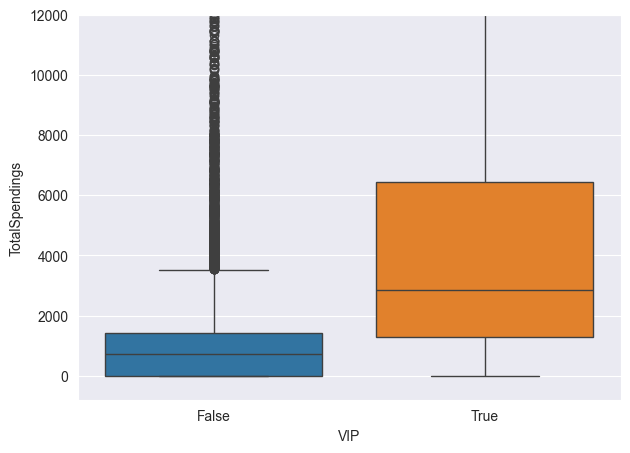

In [28]:
# VIP vs TotalSpendings
plt.figure(figsize = (7, 5))

sns.boxplot(data = df1, x = "VIP", y = "TotalSpendings",palette=["#1f77b4", "#ff7f0e"])
plt.ylim([-800, 12000])

And we are correct

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\3723697032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df1, x = "AgeCat", y = "TotalSpendings",palette='bright')


(-800.0, 12000.0)

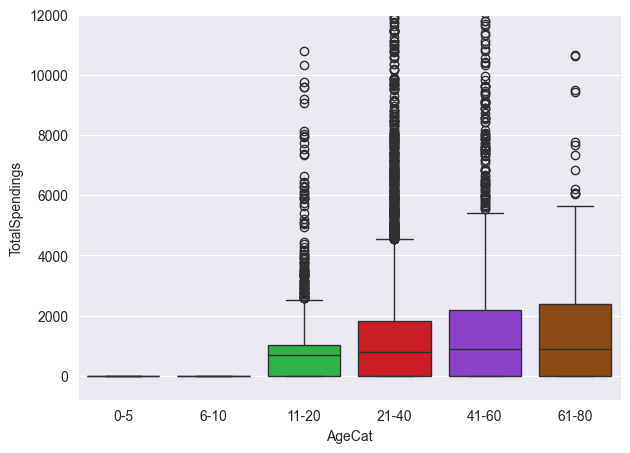

In [29]:
# AgeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = df1, x = "AgeCat", y = "TotalSpendings",palette='bright')
plt.ylim([-800, 12000])

Similarly if you thought that kids weren't spending all of that money, you'd be right, it is only passengers older than 10 years old who spend any money at all.

## Contrary to my previous belief that we should impute the missing values first and then do EDA, now that we have conducted our EDA we are much better prepared to deal with the missing values in our data set

In [30]:
# We will create a new data set that does not contain any of the new columns we created

df2 = df1.copy()

# drop features created during EDA
df2 = df2.drop(["PassengerGroup",
                              "CabinDeck",
                              "CabinNo.",
                              "CabinSide",
                              "FamilyName",
                              "NoRelatives",
                              "CountInPassengerGroup",
                              "AgeCat",
                              "FamilySizeCat", 
                              "TotalSpendings",
                              "IsAlone"], axis = 1)

In [31]:
# We will combine the training and testing data to make the cleaning and preprocessing easier

test_df = pd.read_csv('test.csv')

# here we save the target variable from our training dataset and save it in the variable target
target = df2["Transported"]

# save test PassengerId in test_id
test_id = test_df["PassengerId"]

# drop Transported variable from the train set
df3 = df2.drop(["Transported"], axis = 1)

# Join the train and test set 
data = pd.concat([df3, test_df], axis = 0).reset_index(drop = True)

In [32]:
df3

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [33]:
print(data.shape)

(12970, 13)


In [48]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [34]:
# How many null entries do we have?
data.isnull().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

In [35]:
# Or as a percentage
data.isnull().sum() / data.shape[0]

PassengerId     0.000000
HomePlanet      0.022205
CryoSleep       0.023901
Cabin           0.023053
Destination     0.021126
Age             0.020817
VIP             0.022822
RoomService     0.020278
FoodCourt       0.022282
ShoppingMall    0.023593
Spa             0.021897
VRDeck          0.020663
Name            0.022668
dtype: float64

In [39]:
print((data.isnull().sum() / data.shape[0]).max())
print((data.isnull().sum() / data.shape[0])[1:].min())

0.023901310717039322
0.020277563608326908


- So at most there is 2.4 percent of values missing in a given column and at least 2.02 percent of values missing from a given column
- Because of this we will treat the missing values in the categorical columns first by imputation using the mode

#### here is the method for extracting the categorical variables from a data set and then the steps to extract and fill in the values that are missing

In [40]:
data.select_dtypes(['object','category'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,False,Matty Scheron
12967,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore
12968,9273_01,Europa,False,D/297/P,NaN,False,Kitakan Conale


In [41]:
data.select_dtypes(['object','category']).isna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
12965,False,False,False,False,False,False,False
12966,False,False,False,True,False,False,False
12967,False,False,False,False,False,False,False
12968,False,False,False,False,True,False,False


In [42]:
data.select_dtypes(['object','category']).isna().sum()

PassengerId      0
HomePlanet     288
CryoSleep      310
Cabin          299
Destination    274
VIP            296
Name           294
dtype: int64

In [43]:
# get categorical columns in train dataset with missing values and store in missing_cat_cols
data1 = data.copy()

list_missing_cat_columns = list((data1.select_dtypes(['object', 'category']).isna().sum() > 0).index)
list_missing_cat_columns

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [44]:
# filling in categorical columns in data with mode
for col in list_missing_cat_columns:
    data1[col] = data1[col].fillna(data1[col].mode()[0])

C:\Users\uriah\AppData\Local\Temp\ipykernel_27160\127303405.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1[col] = data1[col].fillna(data1[col].mode()[0])


In [46]:
data1.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             270
VIP               0
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name              0
dtype: int64

We have successfully filled in all the missing values of our categorical columns with the columns respective mode. Don't forget this when considering correlation later on.

##### Filling in Numerical Columns

In [47]:
# grabbing numerical columns with missing values and storing it as a list in list_missing_num_col variable

list_missing_num_columns = list((data1.select_dtypes(np.number).isna().sum() > 0).index)
list_missing_num_columns

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

From our previous EDA we saw that if you were ten years old or younger or you were in cryo sleep you spent no money at any of the amenities

In [48]:
# filling in null values based on Age or CryoSleep

# Building the function
def fill_nana_by_age_and_cryosleep(df):
    df['RoomService'] = np.where((df['Age'] < 13) | (df['CryoSleep']==True),0,df['RoomService'])
    df['FoodCourt'] = np.where((df['Age'] < 13) | (df['CryoSleep']==True),0,df['FoodCourt'])
    df['ShoppingMall'] = np.where((df['Age'] < 13) | (df['CryoSleep']==True),0,df['ShoppingMall'])
    df['Spa'] = np.where((df['Age'] < 13) | (df['CryoSleep']==True),0,df['Spa'])
    df['VRDeck'] = np.where((df['Age'] < 13) | (df['CryoSleep']==True),0,df['VRDeck'])

    return df

In [50]:
# Applying it to our dataframe
data1 = fill_nana_by_age_and_cryosleep(data1)
data1.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             270
VIP               0
RoomService     162
FoodCourt       171
ShoppingMall    163
Spa             166
VRDeck          150
Name              0
dtype: int64

In [51]:
for col in list_missing_num_columns:
    data1[col] = data1[col].fillna(data1[col].mean())

data1.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

Now we turn our attention around to the "other end off the data set" and think about the outliers we identified in our analysis of the numerical variables (excluding Age).

In [54]:
# clip outliers on 99% quantile
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(quantile)
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df      
    
data1 = clipping_quantile(data1, None, 0.99)

In [55]:
data1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.00,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.00,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,5382.86,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.00,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.00,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.00,0.0,Jeron Peter
12966,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.00,144.0,Matty Scheron
12967,9271_01,Mars,True,D/296/P,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.00,0.0,Jayrin Pore
12968,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.00,523.0,Kitakan Conale


And our data set is finally clean